#AML Project

##Group 10


## SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/Oversampled_X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/Oversampled_y_train.csv')

x_test = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/y_test.csv')

x_val = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/AML_Project/dataset/y_val.csv')

In [ ]:
y_train = y_train['attack'].map({'Dos':0, 'Probe':1, 'R2L':2, 'U2R':3, 'normal':4})
y_test = y_test['attack'].map({'Dos':0, 'Probe':1, 'R2L':2, 'U2R':3, 'normal':4})
y_val = y_val['attack'].map({'Dos':0, 'Probe':1, 'R2L':2, 'U2R':3, 'normal':4})

## GridSearch to find the best model

In [ ]:
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2)

start_time = time.time()

grid_search.fit(x_train, y_train)

end_time = time.time()
time_taken = end_time - start_time


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ......................................kernel=linear; total time= 1.2min
[CV] END ......................................kernel=linear; total time= 1.2min
[CV] END ......................................kernel=linear; total time= 1.3min
[CV] END .........................................kernel=rbf; total time= 1.6min
[CV] END .........................................kernel=rbf; total time= 1.6min
[CV] END .........................................kernel=rbf; total time= 1.7min
[CV] END ........................................kernel=poly; total time= 6.3min
[CV] END ........................................kernel=poly; total time= 6.4min
[CV] END ........................................kernel=poly; total time=11.8min


In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Time taken for model selection (GridSearchCV): {time_taken:.2f} seconds")

best_model_svm = grid_search.best_estimator_
y_pred = best_model_svm.predict(x_test)
y_pred_train = best_model_svm.predict(x_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Train Set Accuracy: {accuracy_train:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Time taken for model selection (GridSearchCV): 2093.20 seconds
Best Hyperparameters: {'kernel': 'rbf'}
Best Cross-Validation Score: 0.9982
Train Set Accuracy: 0.9985
Test Set Accuracy: 0.7936


In [ ]:
report_test=classification_report(y_test, y_pred)
print(report_test)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7459
           1       0.70      0.80      0.74      2421
           2       0.96      0.21      0.35      2885
           3       0.34      0.52      0.41        67
           4       0.73      0.96      0.83      9711

    accuracy                           0.79     22543
   macro avg       0.74      0.66      0.64     22543
weighted avg       0.83      0.79      0.77     22543



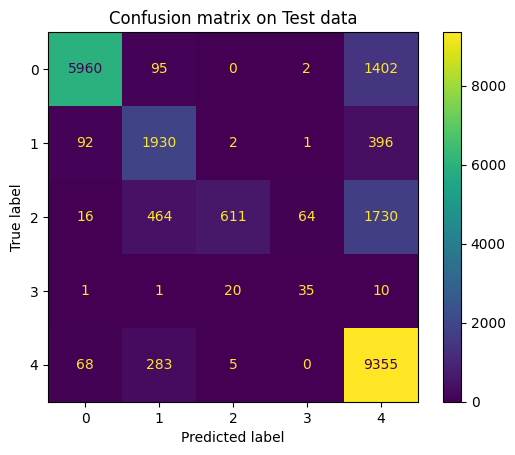

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model_svm.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()